In [1]:
%matplotlib inline
# Libraries
import sys
sys.path.append('/Users/pinheirochagas/Pedro/NeuroSpin/Experiments/Calc_MEG/scripts_git/Calc_MEG/decoding/')
from alphacsc import learn_d_z, update_d_block
from alphacsc.utils import plot_data # noqa
from functools import partial
from prepDataDecoding import prepDataDecoding
from initDirs import dirs
from mne.decoding import UnsupervisedSpatialFilter
from sklearn.decomposition import PCA, FastICA
import mne
import numpy as np
from alphacsc.utils import plot_data # noqa
import matplotlib.pyplot as plt

In [2]:
# Import data
subjects = ['s03']

# Specs parameters
conditions = [['cres_aCSC', 'cres_aCSC']]
baselinecorr = 'nobaseline'
dec_method = 'general' # class reg classGeneral
dec_scorer = 'accuracy' # accuracy or kendall_score
gatordiag = 'diagonal'
decimate = 1

params = prepDataDecoding(dirs, conditions[0][0], conditions[0][1], subjects[0], baselinecorr, decimate)
epochs = params['X_train']
X = params['X_train'].get_data()

importing calc data
done
selecting data
cres_aCSC
cres_aCSC
done
{'X_test': <EpochsArray  |  n_events : 209 (all good), tmin : 1.6 (s), tmax : 3.2 (s), baseline : None, ~196.3 MB, data loaded>, 'times_calc': array([-0.5  , -0.496, -0.492, ...,  4.492,  4.496,  4.5  ]), 'y_train': array([ 4.,  6.,  5.,  6.,  3.,  4.,  3.,  5.,  5.,  3.,  6.,  6.,  4.,
        4.,  5.,  5.,  4.,  6.,  3.,  4.,  3.,  6.,  5.,  5.,  6.,  6.,
        4.,  4.,  4.,  3.,  3.,  4.,  4.,  6.,  3.,  5.,  3.,  6.,  5.,
        3.,  5.,  3.,  6.,  3.,  6.,  5.,  4.,  4.,  3.,  3.,  4.,  5.,
        3.,  4.,  5.,  5.,  6.,  4.,  5.,  6.,  6.,  3.,  4.,  4.,  6.,
        4.,  5.,  3.,  5.,  4.,  5.,  3.,  4.,  4.,  6.,  3.,  5.,  5.,
        3.,  6.,  6.,  3.,  6.,  6.,  3.,  6.,  6.,  3.,  5.,  6.,  3.,
        3.,  4.,  3.,  3.,  4.,  4.,  5.,  6.,  5.,  4.,  5.,  6.,  4.,
        5.,  6.,  4.,  3.,  6.,  6.,  3.,  5.,  4.,  5.,  5.,  4.,  6.,
        4.,  3.,  4.,  3.,  3.,  6.,  6.,  5.,  3.,  3.,  3.,  3.,  5.,

In [3]:
print epochs

<EpochsArray  |  n_events : 209 (all good), tmin : 1.6 (s), tmax : 3.2 (s), baseline : None, ~196.3 MB, data loaded>


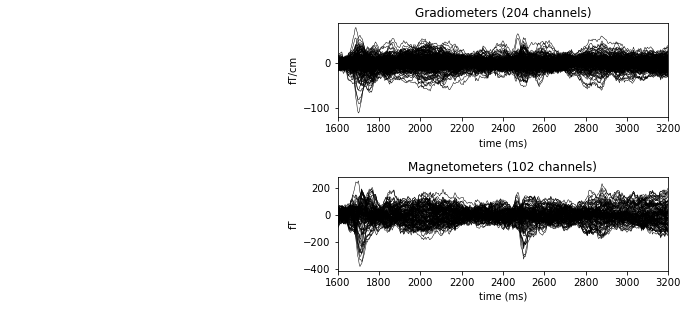

The peaks are for when B and = sign appears


In [7]:
# Basic vizualization of evoked response
evoked = epochs.average()
evoked.plot()
plt.show()
print('The peaks are for when B and = sign appears')

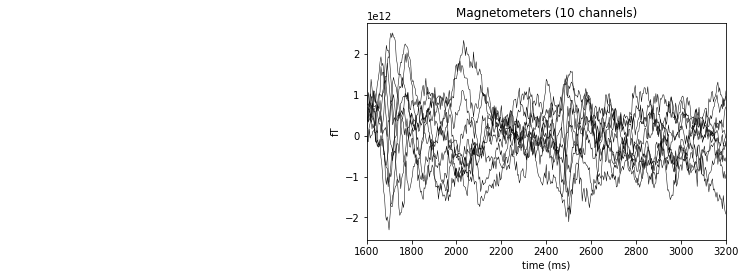

It seems like the ICA preserved the evoked response


In [10]:
# Run ICA and vizualize
n_comp = 10

ica = UnsupervisedSpatialFilter(FastICA(n_comp), average=False)
ica_data = ica.fit_transform(X)
ev1 = mne.EvokedArray(np.mean(ica_data, axis=0),
                      mne.create_info(n_comp, epochs.info['sfreq'],
                                      ch_types='mag'), tmin=epochs.tmin)
ev1.plot(show=False, window_title='ICA')
 v

print('It seems like the ICA preserved the evoked response')

........................................................................................................................................................................................................

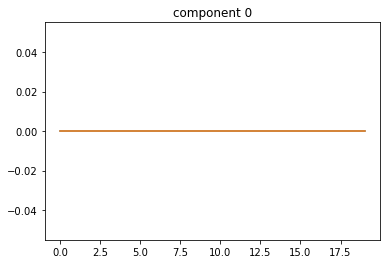

........................................................................................................................................................................................................

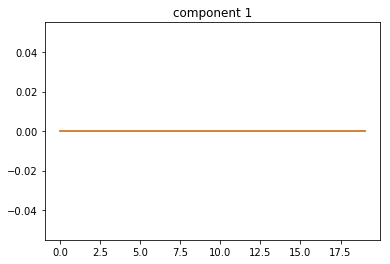

........................................................................................................................................................................................................

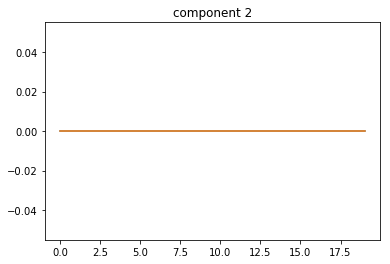

........................................................................................................................................................................................................

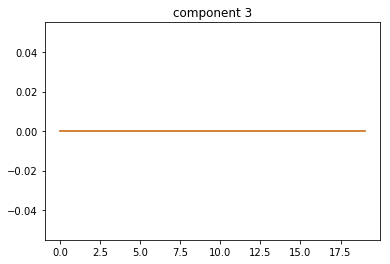

........................................................................................................................................................................................................

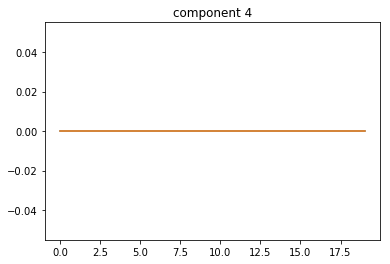

........................................................................................................................................................................................................

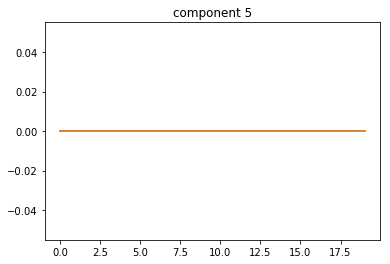

........................................................................................................................................................................................................

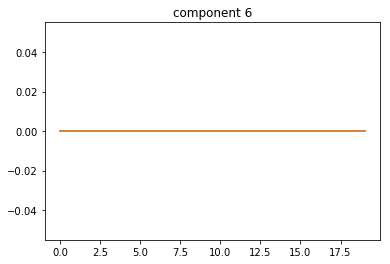

........................................................................................................................................................................................................

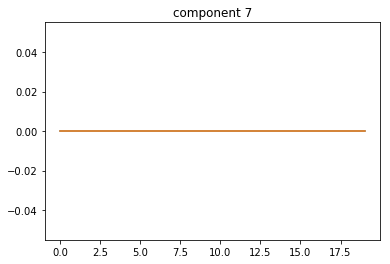

........................................................................................................................................................................................................

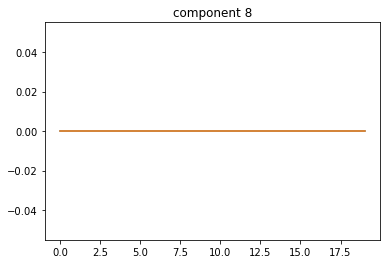

........................................................................................................................................................................................................

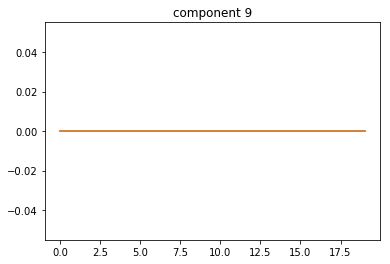

In [19]:
### Run Vanilla CSC for each component
#Specs
n_atoms = 2                # K
n_times_atom = 20          # L
n_times = ica_data.shape[2]    # T
n_trials = ica_data.shape[0]   # N
n_iter = 200
reg = 0.1
random_state = 60
func = partial(update_d_block, projection='dual')

for i in range(ica_data.shape[1]):
# Select 1 component
    Xica = ica_data[:,i,:]
    pobj, times, d_hat, Z_hat = learn_d_z(Xica, n_atoms, n_times_atom, func_d=func, reg=reg, n_iter=n_iter,
        solver_d_kwargs=dict(factr=100), random_state=random_state,
        n_jobs=1, solver_z='l_bfgs', verbose=1)
    plt.plot(d_hat.T)
    plt.title('component %d' % i)
    plt.show()
